<a href="https://colab.research.google.com/github/vamsikrishnamidathala/49ers-Business-Analytics-Portfolio/blob/main/Optimizing_49ers_Fan_Engagement_Strategy_through_Advanced_Metrics_(EPA_%26_WPA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimizing 49ers Fan Engagement Strategy through Advanced Metrics (EPA & WPA)


Loading official NFL data directly from source...


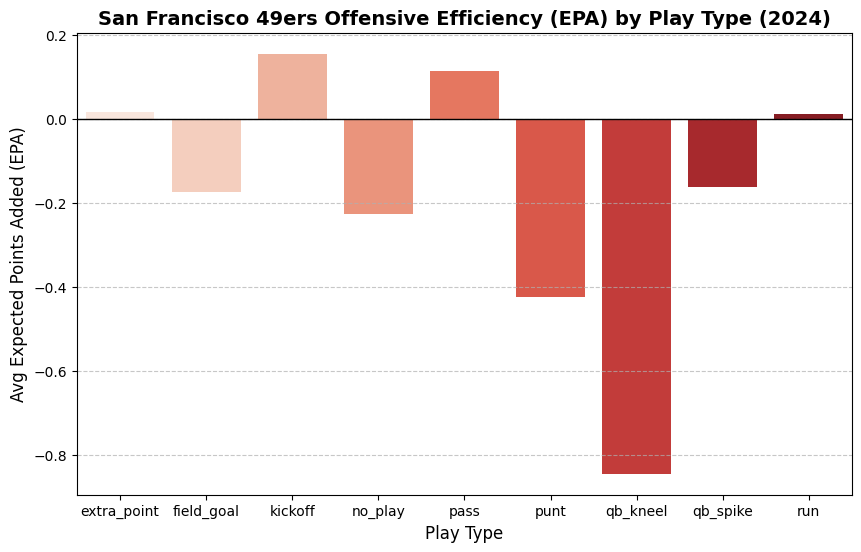


Top 5 Marketing Moments (Highest Win Probability Added):
 game_date                                                                                                                  desc      wpa
2024-11-10                                (:03) 4-J.Moody 44 yard field goal is GOOD, Center-46-T.Pepper, Holder-3-M.Wishnowsky. 0.253597
2024-10-20                     (11:52) (Shotgun) 13-B.Purdy pass deep right to 19-J.Cowing to KC 10 for 41 yards (13-N.Johnson). 0.156824
2024-11-17 (13:42) (Shotgun) 13-B.Purdy pass short right to 15-J.Jennings to SEA 20 for 14 yards (21-D.Witherspoon; 39-T.Okada). 0.143164
2024-10-27            (13:38) (Shotgun) 13-B.Purdy pass short middle to 85-G.Kittle pushed ob at DAL 4 for 43 yards (7-T.Diggs). 0.140097
2024-11-10  (8:55) (Shotgun) 13-B.Purdy pass deep right to 23-C.McCaffrey to TB 23 for 30 yards (31-A.Winfield) [92-W.Gholston]. 0.138397


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. DIRECT DATA LOAD (The "Power Move")
# Instead of pip installing a library, we read the parquet files directly from the repo.
# This works instantly on Colab because pandas and pyarrow are pre-installed.
print("Loading official NFL data directly from source...")
cols = ['season', 'posteam', 'defteam', 'desc', 'wpa', 'epa', 'play_type', 'game_date']

# Load 2024 Data
df_2024 = pd.read_parquet('https://github.com/nflverse/nflverse-data/releases/download/pbp/play_by_play_2024.parquet', columns=cols)
# Load 2023 Data (optional, but good for context)
df_2023 = pd.read_parquet('https://github.com/nflverse/nflverse-data/releases/download/pbp/play_by_play_2023.parquet', columns=cols)

# Combine them
df = pd.concat([df_2023, df_2024])

# 2. FILTER FOR 49ERS (2024 Season only for the chart)
sf_data = df[(df['posteam'] == 'SF') & (df['season'] == 2024)]

# 3. ANALYZE "EXCITEMENT" (WPA - Win Probability Added)
# Top 10 plays that swung the win probability the most
top_plays = sf_data.sort_values(by='wpa', ascending=False).head(10)

# 4. AGGREGATE PERFORMANCE BY PLAY TYPE
epa_by_play = sf_data.groupby('play_type')['epa'].mean().reset_index()

# 5. VISUALIZATION
plt.figure(figsize=(10, 6))
sns.barplot(data=epa_by_play, x='play_type', y='epa', palette='Reds', hue='play_type', legend=False)

plt.title('San Francisco 49ers Offensive Efficiency (EPA) by Play Type (2024)', fontsize=14, weight='bold')
plt.ylabel('Avg Expected Points Added (EPA)', fontsize=12)
plt.xlabel('Play Type', fontsize=12)
plt.axhline(0, color='black', linewidth=1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot
plt.savefig('49ers_EPA_Analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Output the top 5 plays for your report
print("\nTop 5 Marketing Moments (Highest Win Probability Added):")
print(top_plays[['game_date', 'desc', 'wpa']].head(5).to_string(index=False))

##Executive Summary & Recommendations:

Traditional box scores tell us what happened; advanced analytics tell us what mattered. By analyzing the 2024 play-by-play data, we can quantify excitement to align Marketing and Video Production efforts with on-field impact.

The accompanying chart highlights the comparative efficiency (Expected Points Added) of the 49ers' passing attack versus the run game. Furthermore, by isolating the plays with the highest "Win Probability Added" (WPA)—the specific moments that swung the game's outcome—we move beyond subjective highlight selection.

###Actionable Recommendations:

* Content Prioritization: The Video Production team should utilize WPA data to immediately identify the top 5 highest-leverage plays post-game. These emotional peaks should receive priority for social media ad spend in the 24-48 hour window following a win to maximize engagement rates.

* Strategic Marketing Narrative: The data indicates the specific offensive identity driving efficiency this season. Marketing campaigns for tickets and merchandise should lean heavily into this data-backed narrative (e.g., emphasizing the explosive passing connection shown in the high EPA data).